In [1]:
%matplotlib inline
import numpy as np
from scipy import special

import betterplotlib as bpl
bpl.presentation_style()

In [2]:
def true_f_bound(eps_int):
    alpha_star = 0.48
    f_sat = 0.94
    term_a = special.erf(np.sqrt(3 * eps_int / alpha_star))
    term_b = np.sqrt(12 * eps_int / (np.pi * alpha_star))
    term_c = np.exp(-3 * eps_int / alpha_star)
    return (term_a - term_b * term_c) * f_sat

In [4]:
eps_int_art = []
eps_int_true = []
f_bound_art = []
f_bound_true = []

with open("../stdout_tests/f_bound_stdout.txt", "r") as stdout:
    for idx, line in enumerate(stdout):
        if "eps_int" not in line:
            continue

        split_line = line.split(" ")

        initial_mass = float(split_line[-7].replace(",", ""))
        star_ibound = float(split_line[-5].replace(",", ""))
        eps_int = float(split_line[-3].replace(",", ""))
        f_bound = float(split_line[-1].replace(",", ""))
        
        eps_int_art.append(eps_int)
        eps_int_true.append(initial_mass / star_ibound)
        f_bound_art.append(f_bound)
        f_bound_true.append(true_f_bound(eps_int))

In [5]:
ratios_eps_int = [eps_int_art[idx] / eps_int_true[idx]
                  for idx in range(len(eps_int_art))]
ratios_f_bound = [f_bound_art[idx] / f_bound_true[idx]
                  for idx in range(len(f_bound_art))]

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


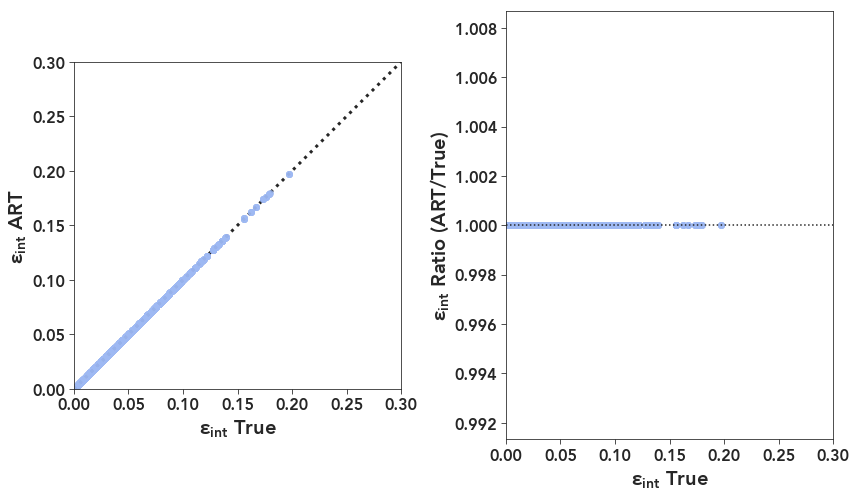

In [6]:
fig, axs = bpl.subplots(ncols=2, figsize=[12, 7])
ax1, ax2 = axs

ax1.scatter(eps_int_true, eps_int_art)
ax1.add_labels("$\epsilon_{int}$ True", "$\epsilon_{int}$ ART")
ax1.plot([0, 1], [0, 1], zorder=0, ls=":", c=bpl.almost_black)
ax1.equal_scale()
ax1.set_limits(0, 0.3, 0, 0.3)

ax2.scatter(eps_int_true, ratios_eps_int)
ax2.add_labels("$\epsilon_{int}$ True", "$\epsilon_{int}$ Ratio (ART/True)")
ax2.axhline(1, ls=":")
ax2.set_limits(0, 0.3)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


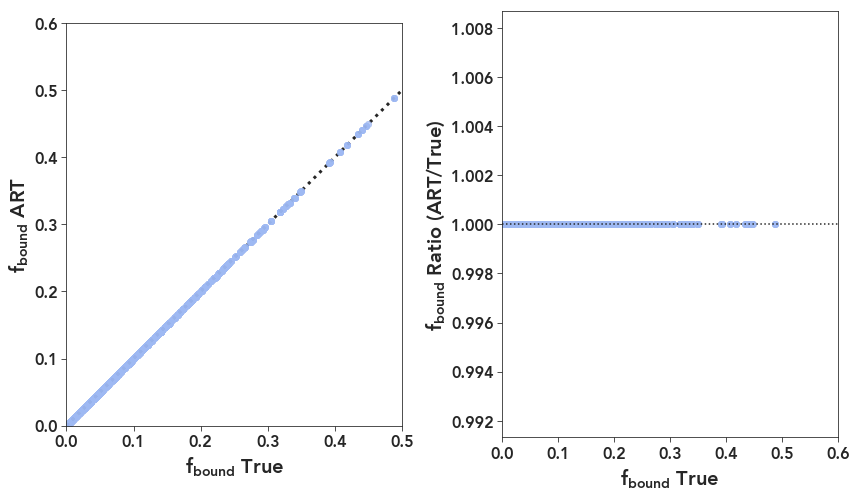

In [7]:
fig, axs = bpl.subplots(ncols=2, figsize=[12, 7])
ax1, ax2 = axs

ax1.scatter(f_bound_true, f_bound_art)
ax1.add_labels("$f_{bound}$ True", "$f_{bound}$ ART")
ax1.plot([0, 1], [0, 1], zorder=0, ls=":", c=bpl.almost_black)
ax1.equal_scale()
ax1.set_limits(0, 0.5, 0, 0.6)

ax2.scatter(f_bound_true, ratios_f_bound)
ax2.add_labels("$f_{bound}$ True", "$f_{bound}$ Ratio (ART/True)")
ax2.axhline(1, ls=":")
ax2.set_limits(0, 0.6)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


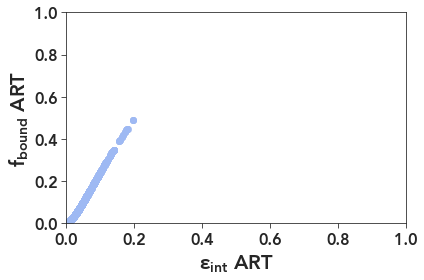

In [8]:
fig, ax = bpl.subplots()
ax.scatter(eps_int_art, f_bound_art)
ax.add_labels("$\epsilon_{int}$ ART", "$f_{bound}$ ART")
ax.set_limits(0, 1, 0, 1)